In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
df = pd.read_csv("16-diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [9]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# most probably there can be 0 in pregnancy hormones but others do not make sense. let's check them automatically.
# you can use generative ai at this point to ask for guidance if you are not sure and if you don't have a domain expert at hand

columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [12]:
# we can drop insulin and fill out the others with median or just do the same thing with insulin
# insulin can be an important factor, so i won't drop it unless i can get a confirmation from a domain expert
# i will fill this out after i check the correlation and do test-train split to avoid data leakage

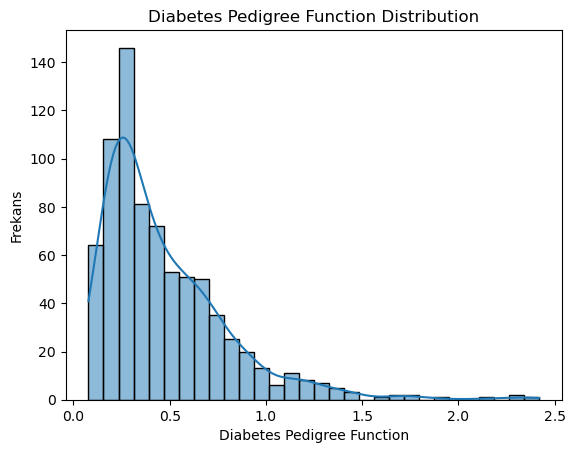

In [13]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

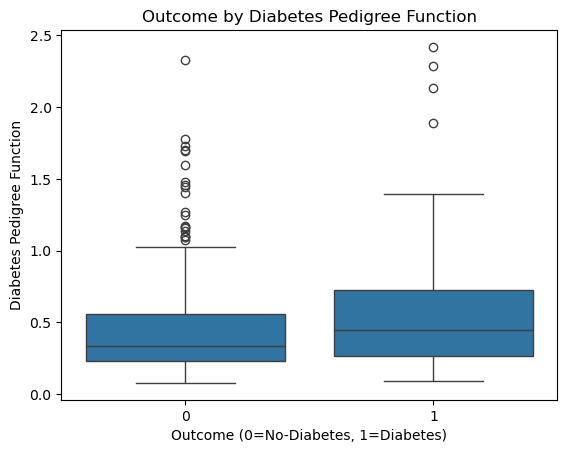

In [14]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

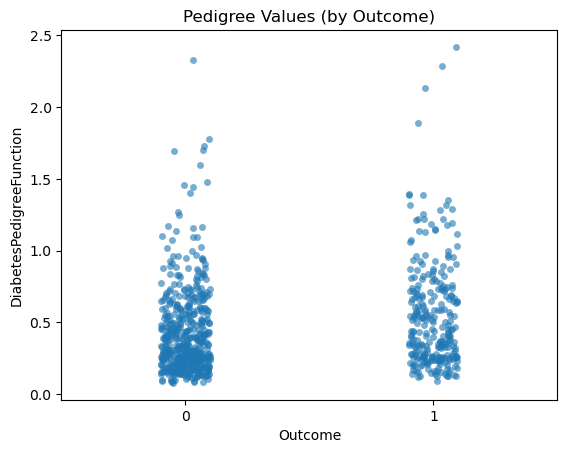

In [15]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [16]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [18]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [19]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [20]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [22]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [23]:
# scaler is not important in tree algorithms but they are important in regression, logistic regression etc.
# where we measure distance and use gradient descent. we do not need to do standardscaler but if you want you can
# use it anyway. if you comment this out you will see you will get the same result. if you will use alternative
# algorithms with adaboost, maybe it makes sense to use standardscaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

0.7532467532467533
[[87 21]
 [17 29]]


In [28]:
#hyperparameter tuning

In [32]:
!pip install tqdm_joblib

In [35]:
from sklearn.model_selection import GridSearchCV
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

In [36]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [38]:
total_combinations = np.prod([len(v) for v in adaboost_param.values()])
n_fits = total_combinations * 5

In [39]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [40]:
with tqdm_joblib(tqdm(desc="AdaBoostClassifier Optimizasyonu",total=n_fits)) as progress_bar:
    grid.fit(X_train, y_train)

AdaBoostClassifier Optimizasyonu:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [42]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [43]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]


In [44]:
# logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [47]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.7532467532467533
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

confusion matrix: 
 [[89 19]
 [19 27]]


In [48]:
# Logistic Regression Hyperparameter Tuning

In [49]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [50]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [51]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [52]:
# GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [53]:
grid.fit(X_train,y_train)

C:\Users\enesu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\enesu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\enesu\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\enesu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [54]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [55]:
model=LogisticRegression(penalty = "l1", C = 100, solver = "liblinear")

In [56]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       108
           1       0.57      0.59      0.58        46

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154

0.7467532467532467
[[88 20]
 [19 27]]


In [57]:
# SVM - SVC

In [58]:
from sklearn.svm import SVC

In [59]:
svc=SVC()

In [60]:
svc.fit(X_train,y_train)

SVC()

In [61]:
y_pred2 = svc.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.54      0.54      0.54        46

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154

0.7272727272727273
[[87 21]
 [21 25]]


In [65]:
# SVM - SVC Hyperparameter Tuning
# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}

In [66]:
grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [68]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.7703318672530987


In [69]:
svc=SVC(C = 1, gamma = "scale", kernel = "linear")

In [70]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [71]:
y_pred2 = svc.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154

0.7467532467532467
[[89 19]
 [20 26]]


In [73]:
# Naive Bayes - Gaussian

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
gnb = GaussianNB()

In [76]:
gnb.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred_nb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154

0.7207792207792207
[[85 23]
 [20 26]]


In [79]:
# KNN Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train ,y_train)

KNeighborsClassifier()

In [82]:
y_pred_knn=classifier.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       108
           1       0.49      0.57      0.53        46

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.71      0.69      0.70       154

0.6948051948051948
[[81 27]
 [20 26]]


In [84]:
# KNN Classifier Hyperparameter Tuning

In [91]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [92]:
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [93]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [94]:
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       108
           1       0.56      0.63      0.59        46

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154

Accuracy: 0.7402597402597403
[[85 23]
 [17 29]]


In [95]:
# Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [98]:
y_pred_tree = tree_model.predict(X_test)

In [99]:
print(accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

0.7272727272727273
[[85 23]
 [19 27]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.54      0.59      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.73      0.73       154



In [100]:
# Decision Tree Classifier - Hyperparameter Tuning

In [101]:
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}

In [102]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param, cv=5, scoring="accuracy")

In [104]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [105]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'best'}

In [106]:
y_pred_tree = grid.predict(X_test)

In [107]:
print(accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

0.7272727272727273
[[85 23]
 [19 27]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.54      0.59      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.73      0.73       154



In [108]:
# Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [111]:
y_pred_forest = rfc.predict(X_test)

In [112]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred_forest)}')

Model accuracy score with 10 decision-trees : 0.7467532467532467


In [113]:
# instantiate the classifier with n_estimators = 100
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred_forest)}')

Model accuracy score with default decision-trees : 0.7207792207792207


In [114]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [117]:
y_pred_random = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred_random)}')

Model accuracy score with default decision-trees : 0.7207792207792207


In [118]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'max_features': 7,
 'max_depth': 15}

In [120]:
print(accuracy_score(y_test, y_pred_random))
print(confusion_matrix(y_test, y_pred_random))
print(classification_report(y_test, y_pred_random))

0.7207792207792207
[[82 26]
 [17 29]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       108
           1       0.53      0.63      0.57        46

    accuracy                           0.72       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.74      0.72      0.73       154

